In [68]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import  cross_val_score
from collections import Counter

In [16]:
# Importing dataset

iris = pd.read_csv("iris.csv")
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [17]:
# Shuffling dataset
from sklearn.utils import shuffle
iris=shuffle(iris)
# Seperating labels from iris
variety=iris['variety']
iris=iris.drop('variety',axis=1)
# We have random data with labels in different variable

In [28]:
# Splitting data into test and train
iris_train,iris_test,variety_train,variety_test=train_test_split(iris,variety,test_size=0.2)
# First split with train size=80%, test size=20%
#iris_test and variety_test will be used in prediction

(120, 4)

In [31]:
# splitting data into cross validation data from iris_train
iris_train_knn,iris_cv,variety_train_knn,variety_cv=train_test_split(iris_train,variety_train,test_size=0.3)
# Second split iris_test_knn 84 points, iris_cv 36 points.

In [38]:
# Prediction on iris_cv for optimum k
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    #fitting model with k=1,2,5....39 on iris_train_knn
    knn.fit(iris_train_knn,variety_train_knn)
    #predicting on iris_cv
    pred=knn.predict(iris_cv)
    #Evaluationg Accuracy
    acc=accuracy_score(variety_cv,pred,normalize=True)*float(100)
    print("\n CV k,accuracy",(i,acc))


 CV k,accuracy (1, 97.22222222222221)

 CV k,accuracy (3, 97.22222222222221)

 CV k,accuracy (5, 100.0)

 CV k,accuracy (7, 100.0)

 CV k,accuracy (9, 97.22222222222221)

 CV k,accuracy (11, 97.22222222222221)

 CV k,accuracy (13, 97.22222222222221)

 CV k,accuracy (15, 100.0)

 CV k,accuracy (17, 97.22222222222221)

 CV k,accuracy (19, 100.0)

 CV k,accuracy (21, 100.0)

 CV k,accuracy (23, 100.0)

 CV k,accuracy (25, 97.22222222222221)

 CV k,accuracy (27, 97.22222222222221)

 CV k,accuracy (29, 97.22222222222221)

 CV k,accuracy (31, 97.22222222222221)

 CV k,accuracy (33, 97.22222222222221)

 CV k,accuracy (35, 97.22222222222221)

 CV k,accuracy (37, 97.22222222222221)

 CV k,accuracy (39, 100.0)


In [48]:
#Here we can see that we have accuracy=100% on 5,7,15,19,21,23,39
# Fitting Actual Model on test data that we left earier
n_list=[5,7,15,19,21,23,39]
for k in n_list:
    knn=KNeighborsClassifier(n_neighbors=k)    
    knn.fit(iris_train_knn,variety_train_knn)
    pred=knn.predict(iris_test)
    acc=accuracy_score(variety_test,pred,normalize=True)*float(100)
    print("\n K,accuracy for shortlisted neighbors is ", (k,acc))
#100% accuracy on 5,7,15,19,21,23


 K,accuracy for shortlisted neighbors is  (5, 100.0)

 K,accuracy for shortlisted neighbors is  (7, 100.0)

 K,accuracy for shortlisted neighbors is  (15, 100.0)

 K,accuracy for shortlisted neighbors is  (19, 100.0)

 K,accuracy for shortlisted neighbors is  (21, 100.0)

 K,accuracy for shortlisted neighbors is  (23, 100.0)

 K,accuracy for shortlisted neighbors is  (39, 90.0)


In [54]:
############################ 10 Fold Cross Validation ############################
cv_scores=[]
neighbors=np.arange(1,40,2)
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)    
    scores=cross_val_score(knn,iris_train,variety_train,cv=10,scoring='accuracy')
    #Considering mean value of 10 fold CV and appending in cv score list
    cv_scores.append(scores.mean())
    
#Error instead of accuracy
MSE=[1-x for x in cv_scores]
optimal_k=neighbors[MSE.index(min(MSE))]
#Returns k values for minimum error
#take max in case of accuracy
print("Optimal k=", optimal_k)


Optimal k= 13


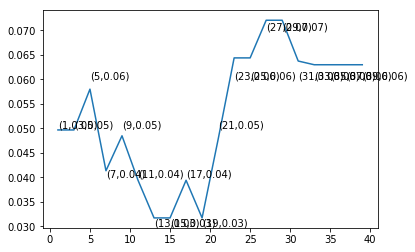

In [59]:
#Plotting misclassification error vs k plot
plt.plot(neighbors,MSE)
for xy in zip(neighbors,np.round(MSE,2)):
    plt.annotate('(%s,%s)'%xy,xy=xy)
plt.show()
#Below clearly show that k=(13,15,20) have low levels of miss-classification

In [62]:
#Applying above on actual test data
n_list=[13,15,20]
for k in n_list:
    knn=KNeighborsClassifier(n_neighbors=k)    
    knn.fit(iris_train_knn,variety_train_knn)
    pred=knn.predict(iris_test)
    acc=accuracy_score(variety_test,pred,normalize=True)*float(100)
    print("\n K,accuracy for shortlisted neighbors is ", (k,acc))
# For k=13,15 we have 100% Accuracy


 K,accuracy for shortlisted neighbors is  (13, 100.0)

 K,accuracy for shortlisted neighbors is  (15, 100.0)

 K,accuracy for shortlisted neighbors is  (20, 96.66666666666667)
